/var/folders/kq/vv3n1vnx70b7hcbwwrw4m02r0000gn/T/ipykernel_86626/3526272758.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0, 0] = t * x[0] + m.sqrt(t) * x[1] - 1
/var/folders/kq/vv3n1vnx70b7hcbwwrw4m02r0000gn/T/ipykernel_86626/3526272758.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1, 0] = m.sqrt(t) * x[0] + (1 + t) * x[1]
/var/folders/kq/vv3n1vnx70b7hcbwwrw4m02r0000gn/T/ipykernel_86626/3526272758.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy

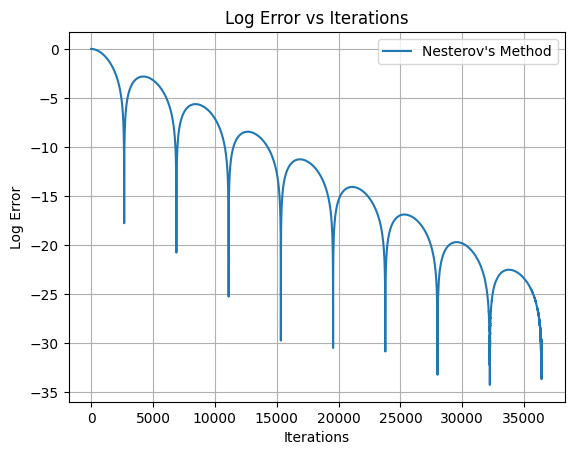

Final minimizer (x): [[1001000.00050295]
 [ -31622.77661757]]
Final minimum value of q1: [[-500500.00000003]]


In [4]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

# Function definition: q1(x)
def evaluate_q1(x, t):
    b1 = np.array([[1], [0]])
    W = np.array([[t, m.sqrt(t)], [m.sqrt(t), 1 + t]])
    return 0.5 * (x.T @ W @ x) - b1.T @ x

# Gradient of q1(x)
def compute_gradient(x, t):
    grad = np.zeros((2, 1))
    grad[0, 0] = t * x[0] + m.sqrt(t) * x[1] - 1
    grad[1, 0] = m.sqrt(t) * x[0] + (1 + t) * x[1]
    return grad

# Step size function: α
def compute_step_size(t):
    return 2 / (3 + m.sqrt(9 - 4 * t**2))

# Compute momentum coefficient: β
def compute_momentum_coefficient(t):
    u0 = (3 + m.sqrt(9 - 4 * t**2)) / (3 - m.sqrt(9 - 4 * t**2))
    return (m.sqrt(u0) - 1) / (m.sqrt(u0) + 1)

# Compute norm of a gradient vector
def gradient_norm(vector):
    return np.linalg.norm(vector)

# Nesterov's Accelerated Gradient Descent
def nesterov_method(initial_x, tolerance, alpha, beta, t):
    x_prev = initial_x
    x_current = initial_x
    iterations = 0
    log_errors = []
    iter_counts = []

    # Theoretical optimal value of q1
    q1_optimal = -500499.99999997

    while gradient_norm(compute_gradient(x_current, t)) > tolerance:
        # Gradient evaluation with momentum correction
        lookahead_grad = compute_gradient(x_current + beta * (x_current - x_prev), t)

        # Save the current x value for updating
        temp_x = x_current.copy()

        # Nesterov's update rule
        x_current -= alpha * lookahead_grad
        x_current += beta * (x_current - x_prev)

        # Update x_prev
        x_prev = temp_x

        # Compute relative error and log it
        relative_error = abs((evaluate_q1(x_current, t) - q1_optimal) / q1_optimal)
        log_errors.append(m.log(relative_error))
        iter_counts.append(iterations)

        # Increment iteration counter
        iterations += 1

    # Plotting log error vs iterations
    plt.plot(iter_counts, log_errors, label="Nesterov's Method")
    plt.xlabel('Iterations')
    plt.ylabel('Log Error')
    plt.title('Log Error vs Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

    return x_current, evaluate_q1(x_current, t)

# Parameters
t_value = 0.001
x_initial = np.array([[3], [5]], dtype=float)  # Explicitly set dtype to float
tolerance_limit = 1e-9
step_size_alpha = compute_step_size(t_value)
momentum_beta = compute_momentum_coefficient(t_value)

# Run Nesterov's method
final_x, final_q1_value = nesterov_method(x_initial, tolerance_limit, step_size_alpha, momentum_beta, t_value)

# Results
print("Final minimizer (x):", final_x)
print("Final minimum value of q1:", final_q1_value)